# P1 William GALBY : Analyse des donées du TITANIC

## Import des librairies


In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
%matplotlib inline
import csv as csv

## Nuage de points et régression linaire : 
### Axe des x : Age des passagers ;
### Axe des y : Tarif des billets.

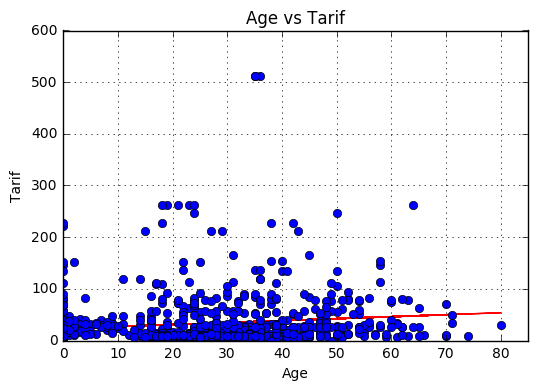

Grâce à la regression linéaire, nous observons plus facilement la présence de valeurs résiduelles.


In [4]:
df = pd.read_csv('train.csv', header=0)
df.fillna(0, inplace=True)
Age  = df['Age']
Age = Age.astype(np.int64)
Tarif = df['Fare']
a, b, c, d, e = ss.linregress(Age,Tarif)
plt.figure();
plt.title('Age vs Tarif')
plt.xlabel('Age')
plt.ylabel('Tarif')
plt.plot(Age, Tarif, 'k.')
line = a*Age+b
plt.plot(Age,line,'r-',Age,Tarif,'o')
plt.axis([0, 85, 0, 600])
plt.grid(True)
plt.show()

print 'Grâce à la regression linéaire, nous observons plus facilement la présence de valeurs résiduelles.'


## Le prix du billet et les survivants ont-ils un lien flagrand ?

In [142]:
#Etablissement de la moyenne du billet
fare = data[0::,9].astype(np.int)
moyenneBillet = np.average(fare)
print('Prix moyen du billet : {p: .2f} €'.format(p=moyenneBillet))

listePascher = fare < moyenneBillet
listeCher = fare >= moyenneBillet

Pauvres = data[listePascher,1].astype(np.float)     
Riches = data[listeCher,1].astype(np.float)

ProportionPauvresSurvivants = np.sum(Pauvres) / np.size(Pauvres)  
ProportionRichesSurvivants = np.sum(Riches) / np.size(Riches) 

print('Proportion de pauvres qui survivent {p:.2f}'.format(
        p=ProportionPauvresSurvivants))
print('Proportion de riches qui survivent {p:.2f}'.format(
        p=ProportionRichesSurvivants))


TypeError: list indices must be integers, not tuple

## Proportion de survivants femmes et hommes :

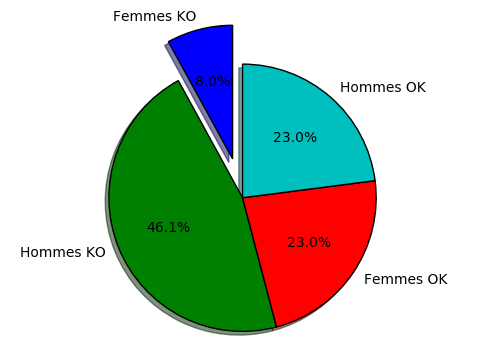

In [133]:
tt = pd.read_csv('train.csv', header=0)

sexF = tt["Sex"] == "female"
sexH = tt["Sex"] == "male"

nbF = len(tt[sexF])
nbH = len(tt[sexH])

#KO -> Morts
survKO = tt["Survived"] == 0
FKO = tt[ sexF & survKO ]
HKO = tt[ sexH & survKO ]
nbFKO = len(FKO)
nbHKO = len(HKO)
proportionHKO = float(nbHKO)/ float(nbH+nbF)
proportionFKO = float(nbFKO)/ float(nbH+nbF)
#OK -> survivants
survOK = tt["Survived"] == 1
HOK = tt [ sexH & survOK ]
FOK = tt [ sexF & survOK ]
nbFOK = len(FOK)
nbHOK = len(HOK)
proportionHOK = float(nbHOK)/ float(nbH+nbF)
proportionFOK = float(nbFOK)/ float(nbH+nbF)

name = ['Femmes KO', 'Hommes KO', 'Femmes OK', 'Hommes OK']
data = [ proportionFKO, proportionHKO, proportionFOK, proportionFOK]

explode=(0.3, 0, 0,0)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.show()

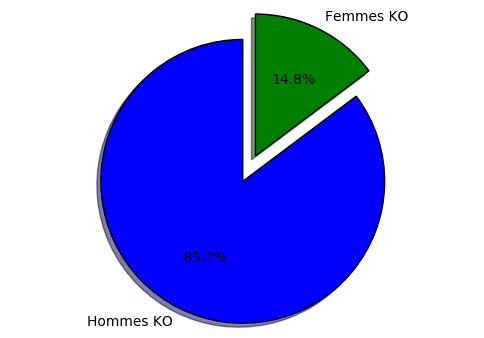

Il y a plus d'hommes décédés que de femmes


In [124]:
propHKO = float(nbHKO)/float(nbFKO+nbHKO)
propFKO = float(nbFKO)/float(nbFKO+nbHKO)

name = ['Hommes KO', 'Femmes KO']
data = [propHKO, propFKO]

explode=(0, 0.2)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.show()

print 'Il y a plus d\'hommes décédés que de femmes'

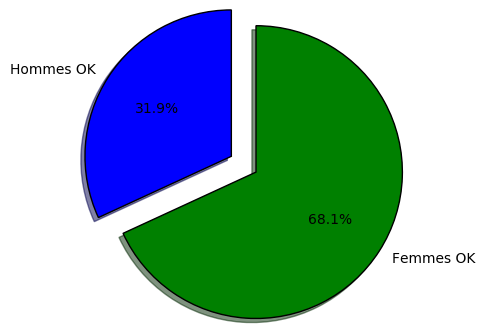

Il y a bien plus de femmes vivante que d'homme


In [136]:
propHOK = float(nbHOK)/float(nbFOK+nbHOK)
propFOK = float(nbFOK)/float(nbFOK+nbHOK)

name = ['Hommes OK', 'Femmes OK']
data = [propHOK, propFOK]

explode=(0, 0.2)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.show()

print 'Il y a bien plus de femmes vivante que d\'homme'

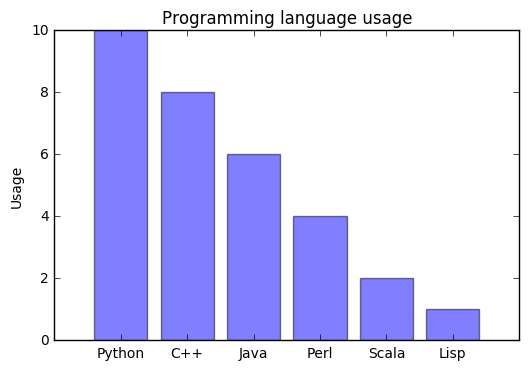

In [135]:
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
 
plt.show()